In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo

In [47]:
data = pd.read_csv('data/reflex70.txt', header=7, sep='|', skiprows=[range(6), 8],on_bad_lines='warn', skipfooter=1, skipinitialspace=True).rename(columns=lambda x: x.strip())
#data = data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
#data['Name'].values.strip()
data = data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
data['Name']

/var/folders/99/vfh56jrs1nqcj8zqtcs5fkv40000gn/T/ipykernel_41897/3435680593.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('data/reflex70.txt', header=7, sep='|', skiprows=[range(6), 8],on_bad_lines='warn', skipfooter=1, skipinitialspace=True).rename(columns=lambda x: x.strip())


0      A2697
1      A2717
2      A2700
3      A2721
4      A2734
       ...  
442    A2667
443    A2670
444    A4059
445    A4067
446    A4068
Name: Name, Length: 447, dtype: object

In [48]:
data.columns

Index(['RXC', 'Name', 'e', 'Ah Am  RAs  Ed Em Es', 'z', 'gal', 'Flux',
       'e_Flux', 'ObsLum', 'Aper', 'LumCor', 'NH', 'tes', 'r_'],
      dtype='object')

In [49]:
ObsLums=data['ObsLum']
LumCors=data['LumCor']

Text(0, 0.5, 'LumCor (10^37 W)')

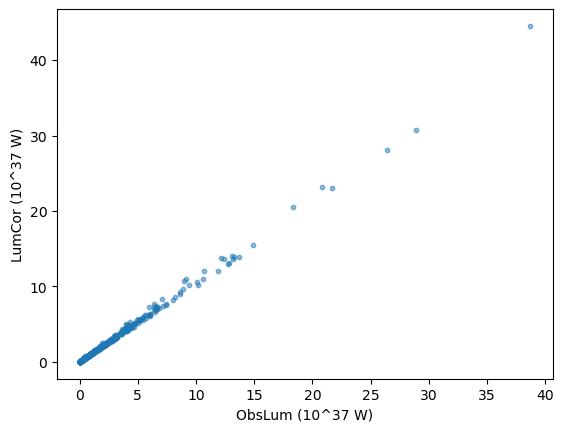

In [50]:
plt.scatter(ObsLums, LumCors, s=10,alpha=0.5)
plt.xlabel('ObsLum (10^37 W)')
plt.ylabel('LumCor (10^37 W)')
#plt.xlim(0, 30)
#plt.ylim(0, 30)

In [51]:
mcxccls=pd.read_csv('data/mcxc|.txt', header=3, sep='|', skiprows=[4],on_bad_lines='warn', skipfooter=1).rename(columns=lambda x: x.strip())
mcxccls = mcxccls.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
mcxc_data = mcxccls[mcxccls['Sub-Cat']=='REFLEX'][['AName', 'L500']].rename(columns={'AName': 'Name'})
mcxc_data

/var/folders/99/vfh56jrs1nqcj8zqtcs5fkv40000gn/T/ipykernel_41897/549640362.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  mcxccls=pd.read_csv('data/mcxc|.txt', header=3, sep='|', skiprows=[4],on_bad_lines='warn', skipfooter=1).rename(columns=lambda x: x.strip())


,Name,L500
4,A2697,6.107094
5,A2717,0.441862
6,A2700,0.846881
9,A2721,1.809494
13,A2734,1.086002
...,...,...
1732,A2667,11.968015
1733,A2670,1.336537
1738,A4059,1.629622
1739,A4067,1.051539


In [52]:
mcxccls.columns

Index(['MCXC', 'OName', 'AName', 'Ah Am  RAs  Ed Em Es', 'RAdeg   DEdeg',
       'GLON    GLAT', 'z', 'Cat', 'Sub-Cat', 'Scale', 'L500', 'M500', 'R500',
       'Notes', 'Cat1', 'Cat2', 'Cat3', 'Cat4', '500r1', '500r2', '500r3',
       '500r4'],
      dtype='object')

In [53]:
L500s=[]
ObsLum_mcxc=[]
for name in mcxc_data['Name']:
    L500s.append(mcxc_data[mcxc_data['Name']==name]['L500'].values[0])
    ObsLum_mcxc.append(data[data['Name']==name]['ObsLum'].values)
    


In [54]:
data[data['Name']=='A2697']['ObsLum']

0    6.395
Name: ObsLum, dtype: float64

In [55]:
mcxc_data_clean=mcxc_data.dropna()
data_clean=data[['Name', 'Flux', 'e_Flux', 'ObsLum', 'LumCor', 'z']].dropna()

comb = pd.merge(mcxc_data_clean, data_clean, on='Name', how='inner', sort=True)
comb


,Name,L500,Flux,e_Flux,ObsLum,LumCor,z
0,1ES0657,20.425901,9.079,7.9,21.646,23.028,0.2965
1,A0013,1.236332,6.071,11.3,1.285,1.353,0.0940
2,A0022,2.872451,5.910,12.1,2.909,3.232,0.1410
3,A0042,1.404549,4.836,13.3,1.491,1.521,0.1120
4,A0085,5.100085,74.215,3.2,5.293,5.631,0.0555
...,...,...,...,...,...,...,...
330,S1101,1.811143,23.412,7.2,1.738,1.998,0.0564
331,S1136,0.504007,5.273,20.5,0.516,0.549,0.0643
332,USGC S152,0.073319,10.929,6.8,0.059,0.072,0.0155
333,Zw0258.9,3.711221,4.973,15.8,3.704,4.209,0.1712


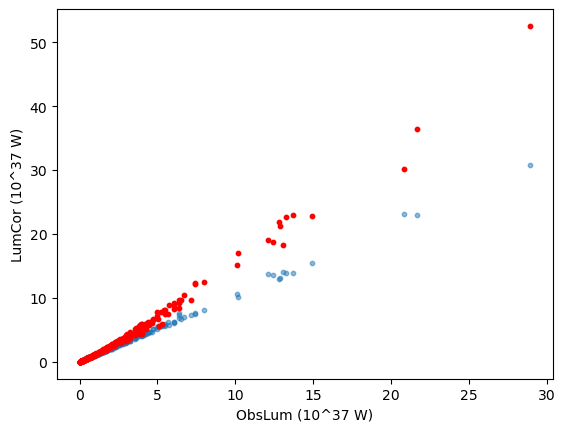

In [56]:
plt.scatter(comb['ObsLum'], comb['LumCor'], s=10,alpha=0.5)
plt.xlabel('ObsLum (10^37 W)')
plt.ylabel('LumCor (10^37 W)')
plt.scatter(comb['ObsLum'], (1+comb['z'])**2*comb['ObsLum'], color='red', s=10)

Text(0, 0.5, 'L500 (10^37 W)')

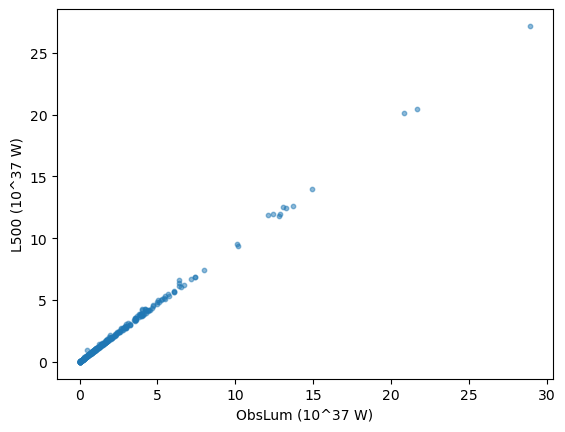

In [57]:
plt.scatter(comb['ObsLum'], comb['L500'], s=10,alpha=0.5)
plt.xlabel('ObsLum (10^37 W)')
plt.ylabel('L500 (10^37 W)')

Text(0, 0.5, 'L500 (10^37 W)')

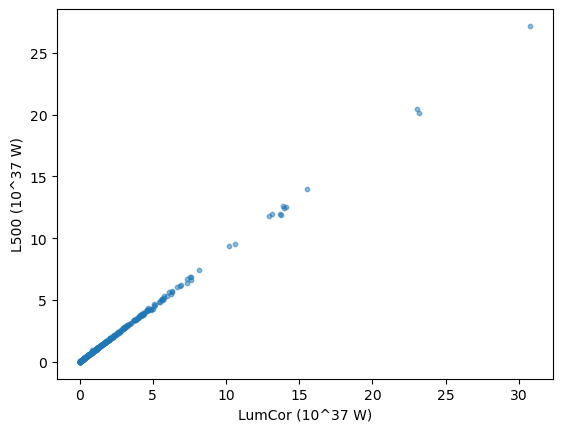

In [58]:
plt.scatter(comb['LumCor'], comb['L500'], s=10,alpha=0.5)
plt.xlabel('LumCor (10^37 W)')
plt.ylabel('L500 (10^37 W)')

In [59]:
slope, intercept = np.polyfit(comb['ObsLum'], comb['LumCor'], 1)

In [60]:
# Calculate the predicted values
predicted_values = slope * comb['ObsLum'] + intercept

# Calculate the residuals
residuals = comb['LumCor'] - predicted_values

# Calculate the variance (mean squared error) of the residuals
variance = np.var(residuals)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Variance (Mean Squared Error): {variance}")


Slope: 1.062716974001451
Intercept: 0.0147934679300423
Variance (Mean Squared Error): 0.027591409485683827


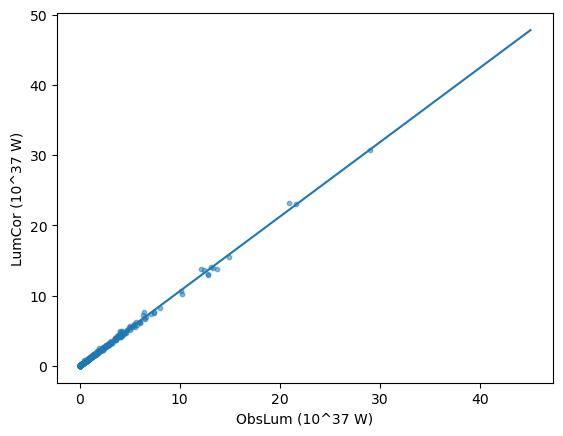

In [61]:
x = np.linspace(0,45)
plt.scatter(comb['ObsLum'], comb['LumCor'], s=10,alpha=0.5)
plt.xlabel('ObsLum (10^37 W)')
plt.ylabel('LumCor (10^37 W)')
plt.plot(x, slope*x+intercept)
plt.fill_between(x, slope*x+intercept - variance, slope*x+intercept+variance, alpha=0.2, label='variance')

Slope: 0.8882623452646002
Intercept: 0.03251295273239208
Variance (Mean Squared Error): 0.003991560202834543


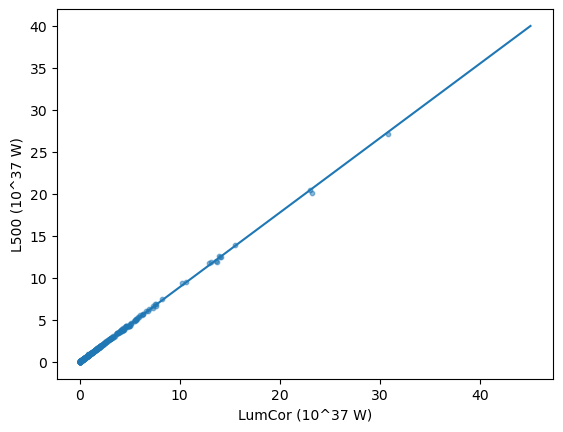

In [62]:
slope2, intercept2 = np.polyfit(comb['LumCor'], comb['L500'], 1)
# Calculate the predicted values
predicted_values2 = slope2 * comb['LumCor'] + intercept2

# Calculate the residuals
residuals2 = comb['L500'] - predicted_values2

# Calculate the variance (mean squared error) of the residuals
variance2 = np.var(residuals2)

print(f"Slope: {slope2}")
print(f"Intercept: {intercept2}")
print(f"Variance (Mean Squared Error): {variance2}")



x = np.linspace(0,45)
plt.scatter(comb['LumCor'], comb['L500'], s=10,alpha=0.5)
plt.xlabel('LumCor (10^37 W)')
plt.ylabel('L500 (10^37 W)')
plt.plot(x, slope2*x+intercept2)
plt.fill_between(x, slope2*x+intercept2 - variance2, slope2*x+intercept2+variance2, alpha=0.2, label='variance')

In [63]:
#from scipy import stats
#slope, intercept, r_value, p_value, std_err = stats.linregress(comb['ObsLum'], comb['LumCor'])


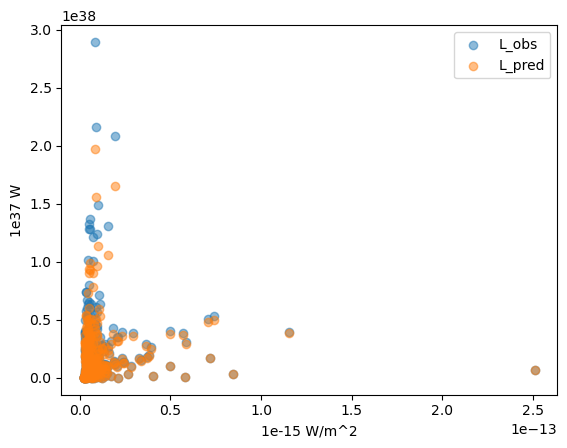

In [64]:
# Flux to ObsLum conversion
d_L = cosmo.comoving_distance(comb['z'])
d_L

Ls=(comb['ObsLum']).to_numpy()*u.W*1e37
fs=comb['Flux'].to_numpy()*u.W*1e-15/u.m**2
plt.scatter(fs, Ls, alpha=0.5, label='L_obs')
plt.scatter(fs, (fs*4*np.pi*d_L**2).to(u.W), alpha=0.5, label='L_pred')
plt.xlabel('1e-15 W/m^2')
plt.ylabel('1e37 W')
plt.legend()

Text(0, 0.5, 'L_pred/L_obs')

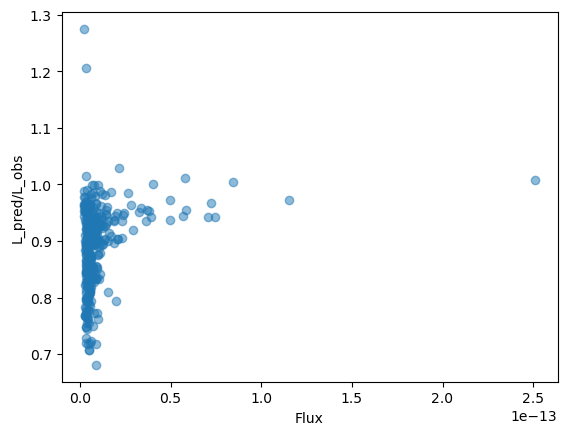

In [65]:
d_L = cosmo.comoving_distance(comb['z'])
L_obs=(comb['ObsLum']).to_numpy()*u.W*1e37
fs=comb['Flux'].to_numpy()*u.W*1e-15/u.m**2
L_pred=(fs*4*np.pi*d_L**2).to(u.W)

L_frac_diff=L_pred/L_obs
plt.scatter(fs, L_frac_diff, alpha=0.5)
plt.xlabel('Flux')
plt.ylabel('L_pred/L_obs')

Text(0, 0.5, 'L_pred/L_obs')

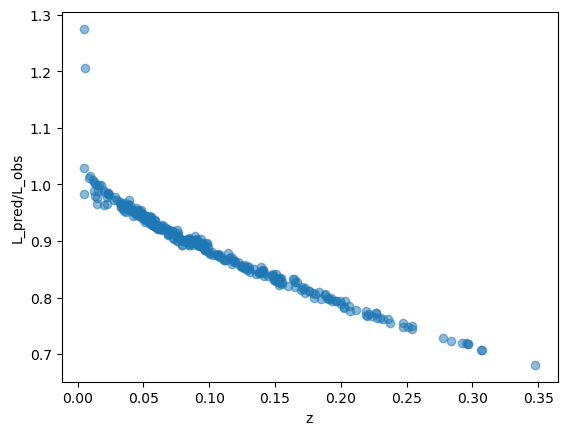

In [66]:
plt.scatter(comb['z'],L_frac_diff, alpha=0.5)
plt.xlabel('z')
plt.ylabel('L_pred/L_obs')

In [67]:
print(L_frac_diff.mean(), L_frac_diff.max(), L_frac_diff.min())


0.890170675298983 1.275076346854892 0.6809075536474521


1.1310313458965677 1.468628148774748 0.7842667636856441


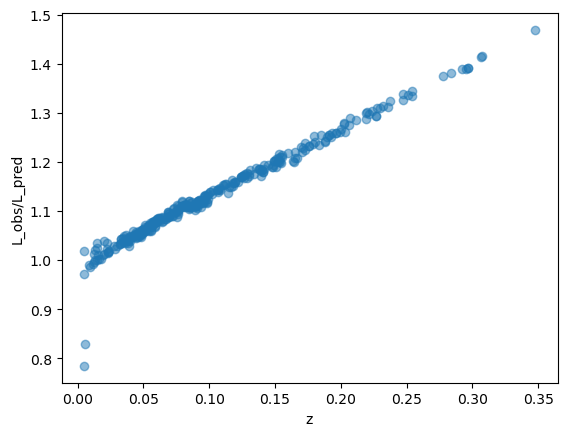

In [68]:
inv_L_frac_diff=L_obs/L_pred
plt.scatter(comb['z'],inv_L_frac_diff, alpha=0.5)
plt.xlabel('z')
plt.ylabel('L_obs/L_pred')
print(inv_L_frac_diff.mean(), inv_L_frac_diff.max(), inv_L_frac_diff.min())

Text(0, 0.5, 'L_pred/L_cor')

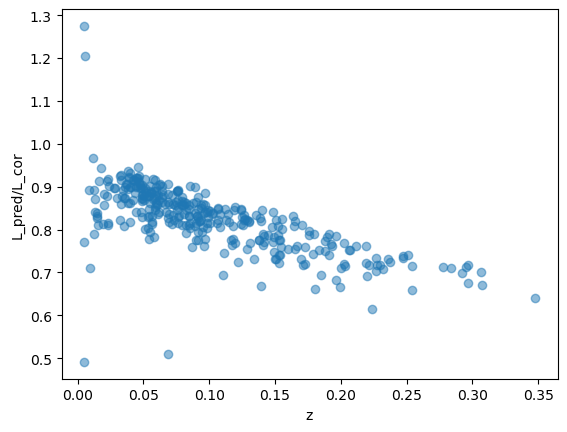

In [69]:
L_cor=(comb['LumCor']).to_numpy()*u.W*1e37
L_cor_frac_diff=L_pred/L_cor
plt.scatter(comb['z'],L_cor_frac_diff, alpha=0.5)
plt.xlabel('z')
plt.ylabel('L_pred/L_cor')

In [70]:
d_L = cosmo.comoving_distance(comb['z']).to(u.m).value #(return meters)
#flux_var=ufloat(comb['Flux'].to_numpy(), comb['e_Flux'].to_numpy())
#Lobs_calc=(comb['Flux'].to_numpy()*u.W*1e-15/u.m**2 * 4*np.pi * d_L**2).to(u.W)
flux_arr=comb['Flux'].to_numpy()*1e-15 # to get in watts
eflux_arr=comb['e_Flux'].to_numpy()
flux_var=np.array([ufloat(flux_arr[i],eflux_arr[i]*flux_arr[i]/100) for i in range(len(flux_arr))])

#originally in units u.W*1e-15/u.m**2 * Mpc**2
Lobs_calc=(flux_var*4*np.pi*d_L**2) * 1e-37 

#Lobs_calc #now in units of 1e37 W
Lobs_err = [L.std_dev for L in Lobs_calc]
Lobs_err

[1.228727318031566,
 0.13011851052467907,
 0.2986337387877081,
 0.17176686358548754,
 0.15977472821139607,
 0.07639897507387228,
 0.09010944921109267,
 0.6494587529328006,
 0.5062393128636207,
 0.02917763928564461,
 0.04176737171494515,
 0.11427182856029242,
 0.043097958301732985,
 0.009853063587416378,
 0.49269439054584224,
 0.16907270063044924,
 0.3837233807087071,
 0.01967590021642398,
 0.2616271262844384,
 0.08866757612729999,
 0.4711691087463421,
 0.6447014209883865,
 0.3752166743065006,
 0.13143882409339294,
 0.06253207113984578,
 0.9749948603151734,
 0.09686502204105851,
 0.08489031765696543,
 1.0035870264599547,
 0.16743415556172972,
 0.2363849987833837,
 0.024132267515859816,
 0.3935314995931071,
 0.3657228290726665,
 0.033905401803435944,
 0.01300950932637972,
 0.14699849385884725,
 0.11596502546159318,
 0.12076106451620819,
 0.10701433296916538,
 0.22802211165511507,
 0.2511423290635243,
 0.4856167804238122,
 0.37580521074059386,
 0.09331070062009121,
 0.050147551096112776,


In [21]:
comb['ObsLum'] #units: 1e37 W

0      21.646
1       1.285
2       2.909
3       1.491
4       5.293
        ...  
330     1.738
331     0.516
332     0.059
333     3.704
334     1.209
Name: ObsLum, Length: 335, dtype: float64

In [44]:
# ObsLum to LumCor conversion 
ObsLum_var=unp.uarray(comb['ObsLum'], Lobs_err)
slope, intercept = np.polyfit(comb['ObsLum'], comb['LumCor'], 1)

# Calculate the predicted values
#predicted_values = slope * comb['ObsLum'] + intercept
predicted_values = slope * ObsLum_var + intercept

# Calculate the residuals
residuals = comb['LumCor'] - predicted_values

# Calculate the variance (mean squared error) of the residuals
variance = np.var(residuals)
print(f"Variance (Mean Squared Error): {variance}")

LumCor_var=[ufloat(L, variance) for L in comb['LumCor']]
comb['LumCor_var']=LumCor_var
comb.head()

TypeError: can't convert an affine function (<class 'uncertainties.core.AffineScalarFunc'>) to float; use x.nominal_value

In [ ]:
# LumCor to L500 conversion 
slope, intercept = np.polyfit(comb['LumCor'], comb['L500'], 1)

# Calculate the predicted values
predicted_values = slope * comb['LumCor'] + intercept

# Calculate the residuals
residuals = comb['L500'] - predicted_values

# Calculate the variance (mean squared error) of the residuals
variance = np.var(residuals)
print(f"Variance (Mean Squared Error): {variance}")

L500_var=[ufloat(L, variance) for L in comb['L500']]
comb['L500_var']=L500_var
comb.head()

In [ ]:
# L500 to T_b
A=ufloat(2.88, 0.15)
B=ufloat(45.06, 0.03)

lum = ((comb['L500']).to_numpy()*u.W*1e37).to(u.erg / u.s)
log_T = (np.log10(lum.value) - B) / A + np.log10(6)
T = 10**log_T * 1e-6
T